<a href="https://colab.research.google.com/github/Zarathos01/Machine-learning-is-fun/blob/main/Image%20Prediction%20using%20Fashion%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input, UpSampling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
# Reshape to match the input shape for VGG16 (height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert from uint8 to float32 and normalize to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Upsample to 32x32 to match VGG16 minimum input size
x_train = tf.image.resize(x_train, [32, 32]).numpy()
x_test = tf.image.resize(x_test, [32, 32]).numpy()

# Repeat grayscale channel 3 times to create RGB-like input
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Load VGG16 model without top fully connected layers, specify input shape
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3)) # Specify input shape here

# Freeze convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Expand grayscale input to 3 channels using a Conv2D layer
input_layer = Input(shape=(32, 32, 3))

# Connect the upsampled input to the VGG16 model
x = base_model(input_layer)
# Add custom fully connected layers
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)
x = Dense(10, activation='softmax')(x)  # Adjust number of classes as needed

# Create new model
model = Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,638,218 (128.32 MB)

 Trainable params: 18,923,530 (72.19 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test)
    )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.7766 - loss: 0.6466 - val_accuracy: 0.8342 - val_loss: 0.4393
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8519 - loss: 0.3982 - val_accuracy: 0.8524 - val_loss: 0.4033
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8665 - loss: 0.3562 - val_accuracy: 0.8612 - val_loss: 0.3926
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8742 - loss: 0.3300 - val_accuracy: 0.8658 - val_loss: 0.3785
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8837 - loss: 0.3073 - val_accuracy: 0.8587 - val_loss: 0.3886
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8896 - loss: 0.2922 - val_accuracy: 0.8691 - val_loss: 0.3704
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8966 - loss: 0.2730 - val_accuracy: 0.8687 - val_loss: 0.3927
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9002 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8709 - loss: 0.3849
Test Accuracy: 0.87


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


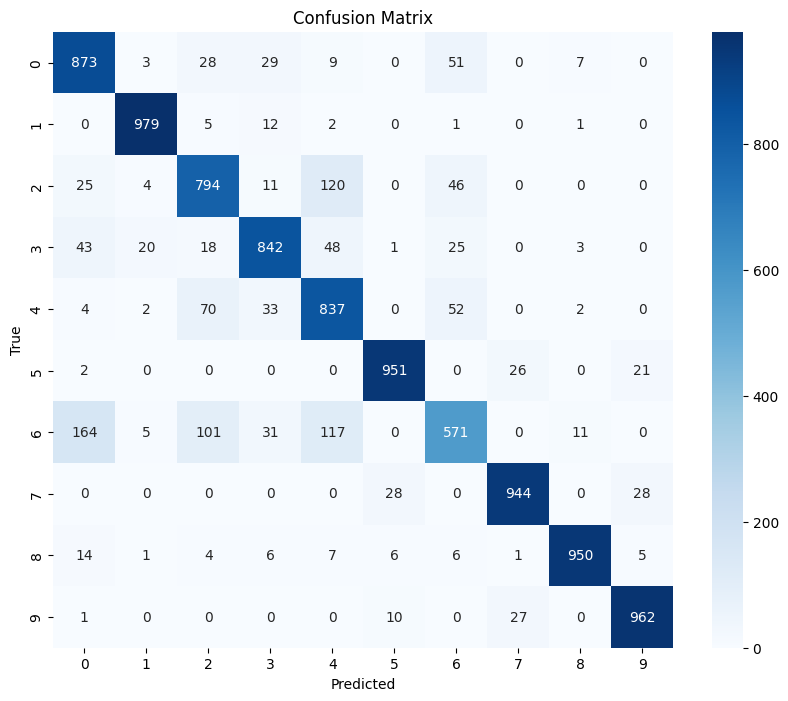

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(x_test), axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1000
           1       0.97      0.98      0.97      1000
           2       0.78      0.79      0.79      1000
           3       0.87      0.84      0.86      1000
           4       0.73      0.84      0.78      1000
           5       0.95      0.95      0.95      1000
           6       0.76      0.57      0.65      1000
           7       0.95      0.94      0.94      1000
           8       0.98      0.95      0.96      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


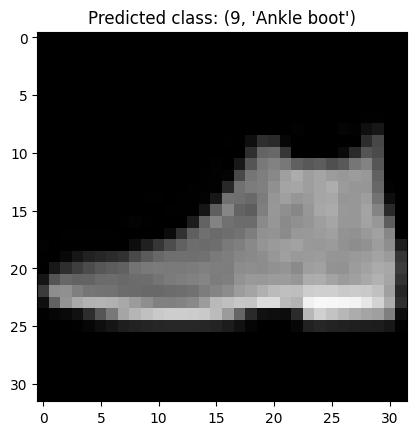

In [ ]:
def plot_predictions(index):
    img = x_test[index] * 255  # Scale pixel values to 0-255
    img = img.astype("uint8")  # Convert to integer values for display

    plt.imshow(img)  # Show the RGB image
    pred = model.predict(np.expand_dims(x_test[index], axis=0))
    predicted_class = np.argmax(pred)

    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    plt.title(f"Predicted class: {predicted_class,class_names[predicted_class]}")
    plt.axis('on')
    plt.show()

# Example usage
plot_predictions(0)